# Introdução

Bem vindos! Esse notebook apresentará um guia para execução dos códigos e execução dos testes. Somente escreva o código dentro do campo informado para evitar erros. 

Informações: Curso de Algoritmo Genético aplicado a um problema multi-objetivo.

Criado e ministrado pelo professor ```Matheus Lôbo dos Santos```

Mídias sociais: [Youtube](https://www.youtube.com/thematheusls), [Instagram](https://www.instagram.com/thematheusls/), [Twitter](https://twitter.com/thematheusls/)

O único modulo que não está previamente instalado no python é o ```Matplotlib```. Para instalar basta executar a célula abaixo:

In [ ]:
pip install matplotlib

Antes de iniciarmos o código, é necessário importar alguns módulos que iremos utilizar.

In [1]:
import math     # Para trabalhar com funções matemáticas
import os       # Para trabalhar com diretórios do sistema operacional

import random   # Para a geração de números aleatórios
random.seed(42) # Para garantir a reprodutibilidade dos resultados
# Durante a execução dos testes iremos padronizar os resultados. Sendo assim, não altere nenhum dos parâmetros abaixo para evitar de avaliação dos resultados.

import matplotlib.pyplot as plt     # Para a geração de gráficos
from matplotlib.ticker import FormatStrFormatter # Para a formatação dos gráficos

# Criando as cidades e as velocidades das estradas

In [2]:
## Funções auxiliares
def generate_random_town_position(width, height) -> tuple:
    """Gera uma tupla aleatória (x, y) que representa a posição da cidade. Dá uma margem de 50px das bordas
    
    Args:
        width (int): largura da imagem
        height (int): altura da imagem
        
    Returns:
        tuple: (x, y) posição da cidade"""
    return (random.randint(50, width - 50), random.randint(50, height - 50))


def generate_all_cities(number_of_cities, width, height) -> list:
    """Gera uma lista de tuplas (x, y) que representa a posição de todas as cidades. Dá uma margem de 50px das bordas
    
    Args:
        number_of_cities (int): número de cidades que serão geradas
        width (int): largura da imagem
        height (int): altura da imagem
        
    Returns:
        list: lista de tuplas (x, y) que representa a posição de todas as cidades"""
    return [generate_random_town_position(width, height) for _ in range(number_of_cities)]


def generate_speed_matrix(number_of_cities: int, min_speed: int, max_speed: int) -> list[list[int]]:
    """Gera uma matriz de velocidades aleatórias para cada cidade. A velocidade é um número inteiro entre min_speed e max_speed
    
    Args:
        number_of_cities (int): número de cidades que serão geradas
        min_speed (int): velocidade mínima
        max_speed (int): velocidade máxima
        
    Returns:
        list[list[int]]: matriz de velocidades aleatórias para cada cidade"""
    return [[random.randint(min_speed, max_speed) if i!=j else 0 for i in range(number_of_cities)] for j in range(number_of_cities)]


def plot_cities(cities: list[tuple[int,int]], width, height):
    """Plota as cidades e suas posições com seus respectivos índices ao lado superior direito

    Args:
        cities (list[tuple[int,int]]): lista de tuplas (x, y) que representa a posição de todas as cidades
        width (int): largura da imagem
        height (int): altura da imagem

    Returns:
        None: Não retorna nada
    """

    fig = plt.figure()

    ax = fig.add_subplot(111)

    ax.set_title(f"Posição das cidades")

    X_pos, Y_pos = [], []

    for city in cities:

        X_pos.append(city[0])
        Y_pos.append(city[1])

    X_pos.append(X_pos[0])
    Y_pos.append(Y_pos[0])

    ax.plot(X_pos, Y_pos, 'o')

    for i, txt in enumerate(range(len(cities))):
        ax.annotate(txt, (X_pos[i], Y_pos[i]), xytext=(X_pos[i]+5, Y_pos[i]+5))

    ax.set_xlabel(" Posição X (m)")
    ax.set_ylabel(" Posição Y (m)")

    ax.set_xlim([0, width])
    ax.set_ylim([0, height])

    ax.grid(True)

    plt.show()

# Configurações e Constantes

In [3]:
# Configuração do ambiente
CANVAS_CITY_WIDTH = 800     # Tamanho do canvas (Largura)
CANVAS_CITY_HEIGHT = 400    # Tamanho do canvas (Altura)

NUMBER_OF_CITIES = 5       # Número máximo de cidades   

MIN_SPEED = 1               # Velocidade mínima das estradas
MAX_SPEED = 10              # Velocidade máxima das estradas

# Configuração do Algoritmo Genético
POPULATION_SIZE = 10        # Tamanho da população
MUTATION_RATE = 0.1         # Taxa de mutação

Executando os testes. Não altere os parâmetros abaixo.

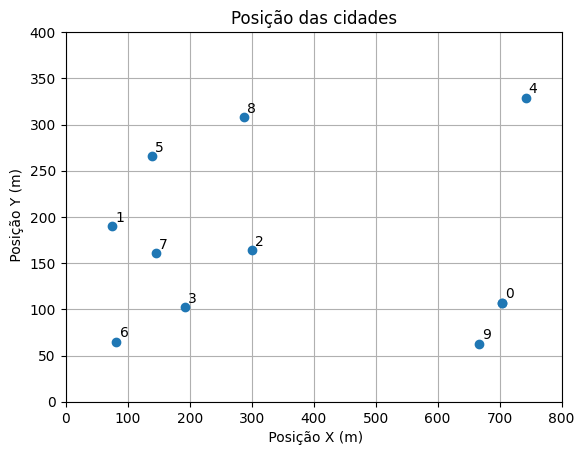

In [4]:
# Testes
random.seed(42) # Para garantir a reprodutibilidade dos resultados
CITIES_POSITION = generate_all_cities(10, CANVAS_CITY_WIDTH, CANVAS_CITY_HEIGHT)

assert len(CITIES_POSITION) == 10, "Número de cidades incorreto"
assert CITIES_POSITION[0] == (704, 107), "Posição da cidade incorreta"
assert CITIES_POSITION[1] == (75, 190), "Posição da cidade incorreta"
assert CITIES_POSITION[2] == (300, 164), "Posição da cidade incorreta"

plot_cities(CITIES_POSITION, CANVAS_CITY_WIDTH, CANVAS_CITY_HEIGHT)

In [5]:
random.seed(42) # Para garantir a reprodutibilidade dos resultados
CITIES_SPEED = generate_speed_matrix(10, 1, 10)

assert len(CITIES_SPEED) == 10, "Número de cidades incorreto"
assert len(CITIES_SPEED[0]) == 10, "Número de cidades incorreto"

# Verifica se a diagonal principal é igual a zero
for i in range(len(CITIES_SPEED)):
    assert CITIES_SPEED[i][i] == 0, "Diagonal principal deve ser igual a zero"

# Verifica se o valor mínimo e máximo estão corretos
for i in range(len(CITIES_SPEED)):
    for j in range(len(CITIES_SPEED[i])):
        if i != j:
            assert CITIES_SPEED[i][j] >= 1, "Valor mínimo deve ser igual a 1"
            assert CITIES_SPEED[i][j] <= 10, "Valor máximo deve ser igual a 10"

CITIES_SPEED

[[0, 2, 1, 5, 4, 4, 3, 2, 9, 2],
 [10, 0, 7, 1, 1, 2, 4, 4, 9, 10],
 [1, 9, 0, 4, 9, 7, 4, 8, 10, 5],
 [1, 3, 7, 0, 6, 5, 3, 4, 6, 2],
 [2, 7, 2, 6, 0, 6, 10, 5, 1, 8],
 [9, 2, 7, 2, 9, 0, 5, 10, 6, 10],
 [4, 2, 1, 4, 5, 2, 0, 4, 2, 7],
 [5, 8, 6, 3, 6, 6, 4, 0, 5, 2],
 [10, 3, 9, 4, 3, 8, 7, 5, 0, 9],
 [4, 6, 1, 4, 1, 6, 7, 5, 2, 0]]

In [6]:
random.seed(42) # Para garantir a reprodutibilidade dos resultados

## Criação das informações das cidades
 
# Cria as posições das cidades
CITIES_POSITION = generate_all_cities(NUMBER_OF_CITIES, CANVAS_CITY_WIDTH, CANVAS_CITY_HEIGHT)

# Cria a matriz de velocidades entre as cidades
CITIES_SPEED = generate_speed_matrix(NUMBER_OF_CITIES, MIN_SPEED, MAX_SPEED)

# Criando a classe que representa os Indivíduo

In [7]:
class Individual:
    def __init__(self, chromosome: list[int]):
        self.chromosome: list[int] = chromosome
        self.distance_fitness: float = self.calculate_total_distance()
        self.time_fitness: float = self.calculate_total_time()
        self.rank: int = -1
        self.crowding_distance: float = -1.0
        self.normalized_distance_fitness: float = -1.0
        self.normalized_time_fitness: float = -1.0


    def calculate_total_distance(self):
        """ Calcula a distância total do cromossomo. A distância total é calculada somando a distância entre cada cidade do cromossomo. A distância entre duas cidades é calculada usando a fórmula de distância euclidiana.
        A distância entre a última cidade e a primeira cidade também é calculada.

        Returns:
            float: distância total do cromossomo
        """
        total_distance: float = 0.0
        
        for index in range(len(self.chromosome)):
            from_citie: int = self.chromosome[index]
            to_citie: int = self.chromosome[(index + 1) % len(self.chromosome)]

            # Calcula a distância entre cada eixo (x, y)
            x = CITIES_POSITION[from_citie][0] - CITIES_POSITION[to_citie][0]
            y = CITIES_POSITION[from_citie][1] - CITIES_POSITION[to_citie][1]

            # Calcula a distância euclidiana entre duas cidades
            total_distance += math.sqrt(x**2 + y**2)

        return total_distance
    
    
    def calculate_total_time(self):
        """ Calcula o tempo total do cromossomo. O tempo total é calculado somando o tempo entre cada cidade do cromossomo. O tempo entre duas cidades é calculado usando a fórmula de distância euclidiana e dividindo pela velocidade da estrada.

        Returns:
            float: tempo total do cromossomo
        """
        total_time: float = 0.0
        
        for index in range(len(self.chromosome)):

            index_to_citie: int = (index + 1) % len(self.chromosome)

            from_citie: int = self.chromosome[index]
            to_citie: int = self.chromosome[index_to_citie]

            # Calcula a distância entre cada eixo (x, y)
            x = CITIES_POSITION[from_citie][0] - CITIES_POSITION[to_citie][0]
            y = CITIES_POSITION[from_citie][1] - CITIES_POSITION[to_citie][1]

            # Calcula a distância euclidiana entre duas cidades
            d = math.sqrt(x**2 + y**2)

            # Calcula o tempo entre duas cidades
            total_time += d / CITIES_SPEED[index][index_to_citie]

        return total_time


    def update_normalized_fitness(self, max_distance_fitness, max_time_fitness):
        """ Atualiza o fitness normalizado do indivíduo. O fitness normalizado é calculado dividindo o fitness do indivíduo pelo maior fitness da população.

        Args:
            max_distance_fitness (float): maior fitness de distância da população
            max_time_fitness (float): maior fitness de tempo da população

        Returns:
            None
        """
        self.normalized_distance_fitness = self.distance_fitness / max_distance_fitness
        self.normalized_time_fitness = self.time_fitness / max_time_fitness

    
    @staticmethod
    def is_dominated(individual, remaining_to_be_ranked) -> bool:
        """ Verifica se o indivíduo é dominado por algum outro indivíduo da população. Um indivíduo é dominado se existe algum outro indivíduo que possui fitness de distância e tempo menores a ele.

        Args:
            individual (Individual): indivíduo que será verificado
            remaining_to_be_ranked (list[Individual]): lista de indivíduos que ainda não foram classificados

        Returns:
            bool: True se o indivíduo for dominado, False caso contrário
        """
        for other_individual in remaining_to_be_ranked:

            # Verifica se é o mesmo indivíduo
            if individual == other_individual:
                continue

            # Verifica se os indivíduos estão na mesma posição em X e Y 
            if ((individual.normalized_distance_fitness == other_individual.normalized_distance_fitness) and (individual.normalized_time_fitness == other_individual.normalized_time_fitness)):
                continue
                # Não há dominância. As duplicatas são retiradas em outro trecho do código
            
            if ((other_individual.distance_fitness <= individual.distance_fitness) and (other_individual.time_fitness <= individual.time_fitness)):
                return False
        
        return True

    
    def __str__(self) -> str:
        """ Retorna uma string com as informações do indivíduo
        """
        return f"Chromosome: {self.chromosome}\nDistance Fitness: {self.distance_fitness}\nTime Fitness: {self.time_fitness}\nRank: {self.rank}\nCrowding Distance: {self.crowding_distance}\nNormalized Distance Fitness: {self.normalized_distance_fitness}\nNormalized Time Fitness: {self.normalized_time_fitness}\n"
    

    def plot(self):

        # Cria a figura e os eixos
        fig, ax = plt.subplots()

        # Configura o título
        ax.set_title(f"Distance Fitness: {self.distance_fitness:.4f}    Time Fitness: {self.time_fitness:.4f}\nRank: {self.rank}    Crowding Distance: {self.crowding_distance:.4f}\nNormalized Distance Fitness: {self.normalized_distance_fitness:.4f}\nNormalized Time Fitness: {self.normalized_time_fitness:.4f}\nCromosome: {self.chromosome}")

        # Cria as listas de posições X e Y
        X_pos, Y_pos = [], []
        for city in self.chromosome:
            X_pos.append(CITIES_POSITION[city][0])
            Y_pos.append(CITIES_POSITION[city][1])

        # Repete o primeiro elemento ao final da lista para fechar o ciclo
        X_pos.append(X_pos[0])
        Y_pos.append(Y_pos[0])

        # Plota as linhas
        ax.plot(X_pos, Y_pos, 'o-')

        # Coloca o número de cada cidade no lado direito superior
        for i, txt in enumerate(self.chromosome):
            ax.annotate(txt, (X_pos[i], Y_pos[i]), xytext=(X_pos[i]+5, Y_pos[i]+5))

        # Configura o eixo X e Y
        ax.set_xlabel(" Posição X (m)")
        ax.set_ylabel(" Posição Y (m)")

        # Definição do intervalo do eixo X
        ax.set_xlim([0, CANVAS_CITY_WIDTH])
        ax.set_ylim([0, CANVAS_CITY_HEIGHT])
    
        # Habilita o grid
        ax.grid(True)
        
        plt.show()
        plt.close()


Testando o indivíduo

In [8]:
Ind1 = Individual([0,1,2,3,4])

In [9]:
print(Ind1)

Chromosome: [0, 1, 2, 3, 4]
Distance Fitness: 1805.713015023599
Time Fitness: 731.9104377630172
Rank: -1
Crowding Distance: -1.0
Normalized Distance Fitness: -1.0
Normalized Time Fitness: -1.0



Não altere os parâmetros abaixo

In [10]:
assert Ind1.distance_fitness == 1805.713015023599, "Distância incorreta"
assert Ind1.time_fitness == 731.9104377630172, "Tempo incorreto"


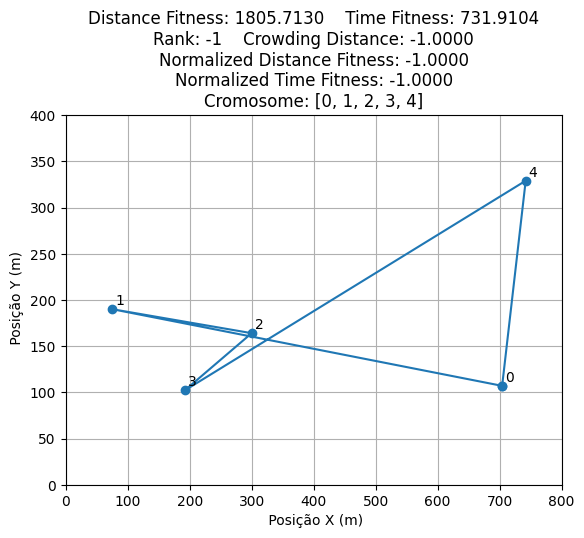

In [11]:
Ind1.plot()

Crie um novo indivíduo, chamado de Ind2 que contenha a solução para o que você considera boa para o problema. 

Chromosome: [1, 2, 4, 0, 3]
Distance Fitness: 1581.9439502604348
Time Fitness: 720.6802068229588
Rank: -1
Crowding Distance: -1.0
Normalized Distance Fitness: -1.0
Normalized Time Fitness: -1.0



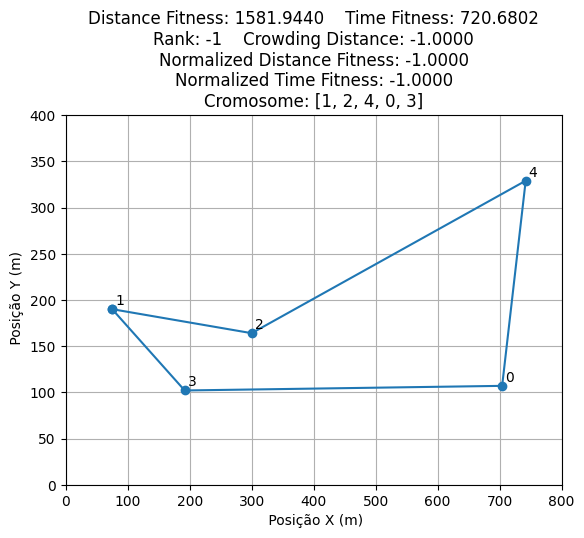

In [12]:
Ind2 = Individual([1,2,4,0,3])
print(Ind2)
Ind2.plot()

Chromosome: [2, 4, 0, 3, 1]
Distance Fitness: 1581.9439502604348
Time Fitness: 925.4476824919686
Rank: -1
Crowding Distance: -1.0
Normalized Distance Fitness: -1.0
Normalized Time Fitness: -1.0



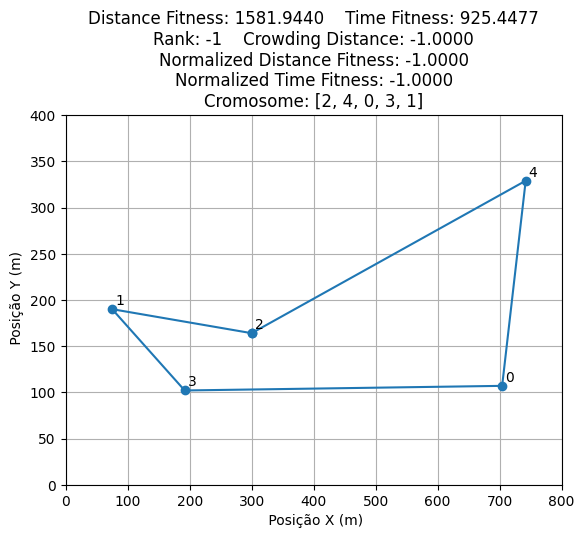

In [13]:
Ind2 = Individual([2,4,0,3,1])
print(Ind2)
Ind2.plot()

# Criando a classe que realiza as operações genéticas

In [14]:
class GeneticAlgorithm:

    @staticmethod
    def tournament_selection(candidate_A: Individual, candidate_B: Individual) -> Individual:
        """ Realiza a seleção por torneio entre dois indivíduos. O indivíduo com menor rank é selecionado. Em caso de empate, o indivíduo com maior distância de multidão é selecionado.

        Args:
            candidate_A (Individual): primeiro candidato
            candidate_B (Individual): segundo candidato

        Returns:
            Individual: indivíduo selecionado
        """
        if candidate_A.rank < candidate_B.rank:
            return candidate_A
        elif candidate_A.rank == candidate_B.rank:
            return candidate_A if candidate_A.crowding_distance > candidate_B.crowding_distance else candidate_B
        else:
            return candidate_B
        

    @staticmethod
    def get_parent(populationOfIndividuals: list[Individual]) -> Individual:
        """ Seleciona dois indivíduos aleatórios da população e realiza a seleção por torneio entre eles.

        Args:
            populationOfIndividuals (list[Individual]): população de indivíduos

        Returns:
            Individual: indivíduo selecionado
        """

        # Seleciona um indivíduo aleatório
        random_individual_1: Individual = random.choice(populationOfIndividuals)
        random_individual_2: Individual = random.choice(populationOfIndividuals)

        # Verifica se os dois indivíduos são iguais e seleciona outro indivíduo aleatório
        while random_individual_1 == random_individual_2:
            random_individual_2 = random.choice(populationOfIndividuals)

        # Realiza a seleção por torneio e retorna o vencedor
        return GeneticAlgorithm.tournament_selection(random_individual_1, random_individual_2)


    @staticmethod
    def do_crossover(parent_A: Individual, parent_B: Individual) -> Individual:
        """ Realiza o crossover entre dois indivíduos. O crossover é feito da seguinte forma:
        1. Escolhe um ponto de corte aleatório entre 1 e o tamanho do cromossomo - 2
        2. Copia os genes do pai A até o ponto de corte
        3. Copia os genes do pai B que não estão no filho até o final do cromossomo
        4. Retorna o filho

        Args:
            parent_A (Individual): primeiro pai
            parent_B (Individual): segundo pai

        Returns:
            Individual: filho gerado
        """
        crossoverPosition: int = random.randint(1, len(parent_A.chromosome) - 2)

        chromosome: list[int] = parent_A.chromosome[:crossoverPosition]

        for gene in parent_B.chromosome:
            if gene not in chromosome:
                chromosome.append(gene)
                
        return Individual(chromosome)
    

    @staticmethod
    def crossover(parent_A: Individual, parent_B: Individual) -> (Individual, Individual):
        """ Realiza o crossover entre dois indivíduos.

        Args:
            parent_A (Individual): primeiro pai
            parent_B (Individual): segundo pai

        Returns:
            (Individual, Individual): filhos gerados
        """

        offspring_A: Individual = GeneticAlgorithm.do_crossover(parent_A, parent_B)
        offspring_B: Individual = GeneticAlgorithm.do_crossover(parent_B, parent_A)

        return offspring_A, offspring_B


    @staticmethod
    def mutation(individual: Individual, mutation_rate: float) -> Individual:
        """ Realiza a mutação em um indivíduo. A mutação tem uma chance de ocorrer definida pela mutation_rate. Se a mutação ocorrer, ela pode ser do tipo swap ou rotate. A mutação swap troca a posição de duas cidades aleatórias do cromossomo. A mutação rotate pega duas cidades aleatórias do cromossomo e inverte a ordem das cidades entre elas.

        Args:
            individual (Individual): indivíduo que será mutado
            mutation_rate (float): chance de ocorrer a mutação no indivíduo (entre 0 e 1)

        Returns:
            Individual: indivíduo mutado ou não
        """

        # Verifica se a mutação irá ocorrer
        if random.random() < mutation_rate:

            # Escolhe aleatoriamente o tipo de mutação que será feita
            if random.random() > 0.5:
                return GeneticAlgorithm.do_swap_mutate(individual)
            else:
                return GeneticAlgorithm.do_rotate_mutate(individual)

        return individual


    @staticmethod
    def do_swap_mutate(individual: Individual) -> Individual:
        """ Realiza a mutação swap em um indivíduo. A mutação swap troca a posição de duas cidades aleatórias do cromossomo. A mutação é feita da seguinte forma:
        1. Criar uma cópia do cromossomo
        2. Escolher duas cidades aleatórias
        3. Trocar as cidades de posição
        4. Retornar um novo indivíduo com o cromossomo mutado

        Args:
            individual (Individual): indivíduo que será mutado

        Returns:
            Individual: indivíduo mutado
        """

        chromosome: list[int] = individual.chromosome

        town_A, town_B = random.sample(individual.chromosome, 2)

        town_A_index: int = chromosome.index(town_A)
        town_B_index: int = chromosome.index(town_B)

        chromosome[town_A_index] = town_B
        chromosome[town_B_index] = town_A

        return Individual(chromosome)


    @staticmethod
    def do_rotate_mutate(individual: Individual) -> Individual:
        """ Realiza a mutação rotate em um indivíduo. A mutação rotate pega duas cidades aleatórias do cromossomo e inverte a ordem das cidades entre elas. A mutação é feita da seguinte forma:
        1. Criar uma cópia do cromossomo
        2. Escolher duas cidades aleatórias
        3. Inverter a ordem das cidades entre elas
        4. Retornar um novo indivíduo com o cromossomo mutado

        Args:
            individual (Individual): indivíduo que será mutado

        Returns:
            Individual: indivíduo mutado
        """

        chromosome: list[int]  = individual.chromosome

        town_A, town_B = random.sample(individual.chromosome, 2)

        town_A_index: int = chromosome.index(town_A)
        town_B_index: int = chromosome.index(town_B)

        first_index: int = min(town_A_index, town_B_index)
        last_index: int = max(town_A_index, town_B_index)

        chromosome = chromosome[:first_index] + chromosome[first_index:last_index][::-1] + chromosome[last_index:]

        return Individual(chromosome)

# Criando o universo

In [15]:
class World:
    def __init__(self):
        self.populationOfIndividuals: list[Individual] = []

        self.generations_count: int = 0
        self.no_improvement_count: int = 0

        self.min_distance_fitness: float = float("inf")
        self.max_distance_fitness: float = float("-inf")

        self.min_time_fitness: float = float("inf")
        self.max_time_fitness: float = float("-inf")

        # Cria a população inicial de indivíduos
        self.spawn()

        # Atualiza os Fitness de toda a população e retorna os indivíduos agrupados por rank
        self.update_normalized_fitness()

        # Armazena o histórico de fitness
        self.distance_fitness_history = []
        self.time_fitness_history = []

        # Armazena os melhores valores de fitness
        self.store_fitness_history()

        self.PATH_individuals = ".\\Códigos\\Resultados\\Indivíduos\\"
        self.PATH_Pareto = ".\\Códigos\\Resultados\\Pareto\\"

        # # Limpa a pasta de resultados com os gráficos
        # for file in os.listdir(self.PATH_individuals):
        #     os.remove(self.PATH_individuals + file)

        # # Limpa a pasta de resultados com os gráficos
        # for file in os.listdir(self.PATH_Pareto):
        #     os.remove(self.PATH_Pareto + file)


    def spawn(self):
        """ Cria a população inicial de indivíduos. A população inicial é criada com indivíduos aleatórios. O tamanho da população é definido pela constante POPULATION_SIZE.

        Returns:
            None
        """

        # Enquanto a população não estiver completa
        while len(self.populationOfIndividuals) < POPULATION_SIZE:

            # Cria um cromossomo aleatório. Uma lista com números de 0 ao (número de cidades) embaralhados Ex: [0, 1, 2, 3, 4, ...]. LEMBREM: NÃO PODE HAVER REPETIÇÃO DE CIDADES. 
            cromossome: list[int] = list(range(0, NUMBER_OF_CITIES))
            random.shuffle(cromossome)

            individual: list[Individual] = Individual(cromossome)

            if individual not in self.populationOfIndividuals:
                self.populationOfIndividuals.append(individual)


    def store_fitness_history(self):
        """ Armazena os menores valores de fitness de toda a população

        Returns:
            None
        """

        # Armazena o histórico de fitness
        self.distance_fitness_history.append(max(self.populationOfIndividuals, key=lambda x: x.distance_fitness).distance_fitness)

        self.time_fitness_history.append(max(self.populationOfIndividuals, key=lambda x: x.time_fitness).time_fitness)


    def find_min_max_fitness(self):
        """ Encontra os menores e maiores valores de fitness entre toda a população e armazena nas variáveis min_distance_fitness, max_distance_fitness, min_time_fitness e max_time_fitness. Reseta os valores de rank e crowding distance de toda a população.

        Returns:
            None
        """

        for individual in self.populationOfIndividuals:
            # Reseta os valores de rank e crowding distance
            individual.rank = -1
            individual.crowding_distance = -1

            if individual.distance_fitness > self.max_distance_fitness:
                self.max_distance_fitness = individual.distance_fitness
            if individual.distance_fitness < self.min_distance_fitness:
                self.min_distance_fitness = individual.distance_fitness

            if individual.time_fitness > self.max_time_fitness:
                self.max_time_fitness = individual.time_fitness
            if individual.time_fitness < self.min_time_fitness:
                self.min_time_fitness = individual.time_fitness


    def calculate_crowding_distance(self, individuals_in_rank):
        """ Calcula a crowding distance de cada indivíduo em um rank. A crowding distance é calculada somando a distância entre os indivíduos vizinhos. A distância entre dois indivíduos é calculada usando a fórmula de distância euclidiana. A crowding distance dos indivíduos da borda é definida como infinito.

        Args:
            individuals_in_rank (list[Individual]): lista de indivíduos do rank

        Returns:
            None
        """
        
        # Ordena a lista pela distância normalizada
        individuals_in_rank.sort(key=lambda x: x.normalized_distance_fitness)

        # Percorre toda a lista de indivíduos pelo índice
        for index in range(len(individuals_in_rank)):

            # Verifica se é o primeiro ou último indivíduo da lista e define a crowding distance como infinito
            if index == 0 or index == (len(individuals_in_rank) - 1):
                individuals_in_rank[index].crowding_distance = float("inf")

            # Se não for o primeiro ou último indivíduo, calcula a crowding distance usando os indivíduos vizinhos
            else:

                # Seleciona o indivíduo atual e os vizinhos
                current = individuals_in_rank[index]
                left = individuals_in_rank[index - 1]
                right = individuals_in_rank[index + 1]

                # Calcula a posição normalizada do indivíduo central (distância, tempo). current 
                current_position = current.normalized_time_fitness, current.normalized_distance_fitness

                # Calcula a posição normalizada dos indivíduos vizinhos (distância, tempo)
                left_position = left.normalized_time_fitness, left.normalized_distance_fitness
                right_position = right.normalized_time_fitness, right.normalized_distance_fitness

                # Calcula a distância euclidiana entre o indivíduo atual e o vizinho da esquerda e o vizinho da direita
                distance_left = math.sqrt(math.pow(current_position[0] - left_position[0], 2) + math.pow(current_position[1] - left_position[1], 2))
                distance_right = math.sqrt(math.pow(current_position[0] - right_position[0], 2) + math.pow(current_position[1] - right_position[1], 2))
                
                # Soma as distâncias e define a crowding distance do indivíduo atual
                current.crowding_distance = distance_left + distance_right


    def update_normalized_fitness(self) -> list[Individual]:
        """ Atualiza o fitness normalizado de toda a população. O fitness normalizado é calculado dividindo o fitness de cada indivíduo pelo maior fitness da população. Em seguida, atualiza o rank e a crowding distance de toda a população.

        Returns:
            list[Individual]: lista de indivíduos agrupados por rank
        """

        # Encontra os menores e maiores valores de fitness
        self.find_min_max_fitness()

        # Atualiza o fitness normalizado de cada indivíduo com os novos máximos de fitness
        for individual in self.populationOfIndividuals:
            individual.update_normalized_fitness(self.max_distance_fitness, self.max_time_fitness)

        ## Atualiza o rank e a crowding distance de toda a população
        
        # Cria uma cópia da população de indivíduos
        remaining_to_be_ranked = self.populationOfIndividuals.copy()

        # Lista que irá armazenar os indivíduos agrupados por rank
        ranks: list[list[Individual]] = []

        # Inicia o rank em 1
        rank = 1

        # Enquanto houver indivíduos para serem classificados 
        while len(remaining_to_be_ranked) > 0:

            # Lista que irá armazenar os indivíduos do rank atual
            individuals_in_rank: list[Individual] = []

            # Percorre todos os indivíduos que ainda não foram classificados
            for individual in remaining_to_be_ranked:

                # Verifica se o indivíduo é dominado por algum outro indivíduo que ainda não foi classificado. Adiciona o novo rank ao indivíduo e o adiciona na lista de indivíduos do rank atual
                if Individual.is_dominated(individual, remaining_to_be_ranked):
                    individual.rank = rank
                    individuals_in_rank.append(individual)

            # Remove os indivíduos que já foram classificados da lista de indivíduos que ainda não foram classificados
            for individual in individuals_in_rank:
                remaining_to_be_ranked.remove(individual)

            # Incrementa o rank 
            rank += 1

            # Adiciona a lista de indivíduos do rank atual na lista de ranks
            ranks.append(individuals_in_rank)


        # Calcula a crowding distance em cada rank
        for individuals_in_rank in ranks:
            self.calculate_crowding_distance(individuals_in_rank)
        

        # Verifica se toda a população tem o crowdingDistance diferente de -1
        for individual in self.populationOfIndividuals:
            if individual.crowding_distance == -1:
                raise Exception("Crowding distance não foi calculada corretamente!")

        return ranks
    
    def __str__(self) -> str:
        """ Retorna uma string com as informações da população de indivíduos.
        """
        txt = ""
        txt += "Min distance fitness: " + str(self.min_distance_fitness) + "\n"
        txt += "Max distance fitness: " + str(self.max_distance_fitness) + "\n\n"
        txt += "Min time fitness: " + str(self.min_time_fitness) + "\n"
        txt += "Max time fitness: " + str(self.max_time_fitness) + "\n\n"
        for index, individual in enumerate(self.populationOfIndividuals, start=1):
            txt += "# Individual: " + str(index) + "\n"
            txt += str(individual) + "\n"
        return txt


    def evolution(self) -> None:
        """ Função principal do algoritmo genético. Realiza a seleção dos pais, crossover, mutação e atualiza o fitness normalizado de toda a população. Em seguida, encontra os novos melhores indivíduos não duplicados e substitui a população atual por eles. Por fim, armazena os melhores valores de fitness. O processo é repetido até que o número máximo de gerações seja atingido. O processo acontece da seguinte forma:
        1. Criar uma lista vazia para armazenar os descendentes.
        2. Percorre um loop pela metade do tamanho da população.
        3. Encontra dois pais usando a função get_parent.
        4. Realiza o crossover entre os pais usando a função crossover.
        5. Realiza a mutação nos descendentes usando a função mutation.
        6. Adiciona os descendentes na lista de descendentes.
        7. Adiciona os descendentes na população.
        8. Atualiza o fitness normalizado de toda a população e retorna os indivíduos agrupados por rank.
        9. Encontra os novos melhores indivíduos não duplicados.
        10. Substitui a população atual pelos novos melhores indivíduos não duplicados.
        11. Armazena os melhores valores de fitness.
        
        Returns:
            None
        """

        # Incrementa o número de gerações
        self.generations_count += 1

        # Cria uma lista vazia para armazenar os descententes
        offspring = []

        # Percorre toda a população
        for _ in range(POPULATION_SIZE//2):

            # Encontra os pais únicos e aleatoriamente
            parent_1 = GeneticAlgorithm.get_parent(self.populationOfIndividuals)
            parent_2 = GeneticAlgorithm.get_parent(self.populationOfIndividuals)

            while parent_1 == parent_2:
                parent_2 = GeneticAlgorithm.get_parent(self.populationOfIndividuals)

            # Realiza o crossover
            offspring_A, offspring_B = GeneticAlgorithm.crossover(parent_1, parent_2)

            # Realiza a mutação
            offspring_A = GeneticAlgorithm.mutation(offspring_A, MUTATION_RATE)
            offspring_B = GeneticAlgorithm.mutation(offspring_B, MUTATION_RATE)

            # Adiciona os descendentes na lista de descendentes
            offspring.append(offspring_A)
            offspring.append(offspring_B)

        # Adiciona os descendentes na população
        self.populationOfIndividuals.extend(offspring)

        # Atualiza os Fitness de toda a população e retorna os indivíduos agrupados por rank
        ranks = self.update_normalized_fitness()

        # Encontra os novos melhores indivíduos não duplicados
        new_population: list[Individual] = []
        for rank in ranks:
            for individual_in_rank in rank:
                is_new_individual = True
                for individual_in_population in new_population:
                    if individual_in_rank.chromosome == individual_in_population.chromosome:
                        is_new_individual = False
                        break
                
                if is_new_individual:
                    new_population.append(individual_in_rank)

                if len(new_population) == POPULATION_SIZE:
                        break
                
            if len(new_population) == POPULATION_SIZE:
                        break

        while(len(new_population) < POPULATION_SIZE):
            first_rank = self.update_normalized_fitness()[0]

            # Caso o tamanho da população não seja completado, cria clones dos inidivíduos dos primeiros front
            new_population.append(Individual(first_rank[random.randint(len(first_rank))].chromosome))

        self.populationOfIndividuals = []
        self.populationOfIndividuals.extend(new_population)

        self.store_fitness_history()


    def get_best_individual(self) -> Individual:
        """ Retorna o melhor indivíduo da população. O melhor indivíduo é definido como o indivíduo com o menor rank e maior crowding distance.

        Returns:
            Individual: melhor indivíduo
        """

        return min(self.populationOfIndividuals, key=lambda x: (x.rank, -x.crowding_distance))

    
    def plot_Pareto_front(self):
        """ Plota o Pareto front da população usando cores para representar o rank. 
        """

        colors = ["red", "blue", "green", "yellow", "orange", "purple", "pink", "gray", "black", "brown"]

        # Plota o Pareto front da população usando cores para representar o rank
        plt.figure(figsize=(5, 5))
        plt.title(f"Frente de Pareto - Geração {self.generations_count}")
        plt.xlabel("Distância Normalizada")
        plt.ylabel("Tempo Normalizado")

        for individual in self.populationOfIndividuals:
            plt.scatter(individual.normalized_distance_fitness, individual.normalized_time_fitness, color=colors[individual.rank - 1] if individual.rank < len(colors) else colors[-1], s=20)

        # Altera os limites dos eixos para que os pontos não fiquem na borda
        #plt.xlim(0, 1)
        #plt.ylim(0, 1)

        # Os valores do eixo y são mostrados com 3 casas decimais
        plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.3f'))

        plt.show()

        plt.close()

# Executando o universo

In [16]:
random.seed(1)

NUMBER_OF_CITIES = 30        # Número máximo de cidades   

MIN_SPEED = 5               # Velocidade mínima das estradas
MAX_SPEED = 10              # Velocidade máxima das estradas

# Configuração do Algoritmo Genético
POPULATION_SIZE = 100         # Tamanho da população
MUTATION_RATE = 0.01         # Taxa de mutação

In [17]:
# Cria as posições das cidades
CITIES_POSITION = generate_all_cities(NUMBER_OF_CITIES, CANVAS_CITY_WIDTH, CANVAS_CITY_HEIGHT)

# Cria a matriz de velocidades entre as cidades
CITIES_SPEED = generate_speed_matrix(NUMBER_OF_CITIES, MIN_SPEED, MAX_SPEED)

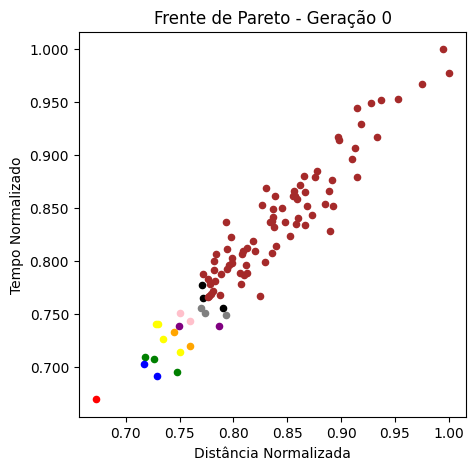

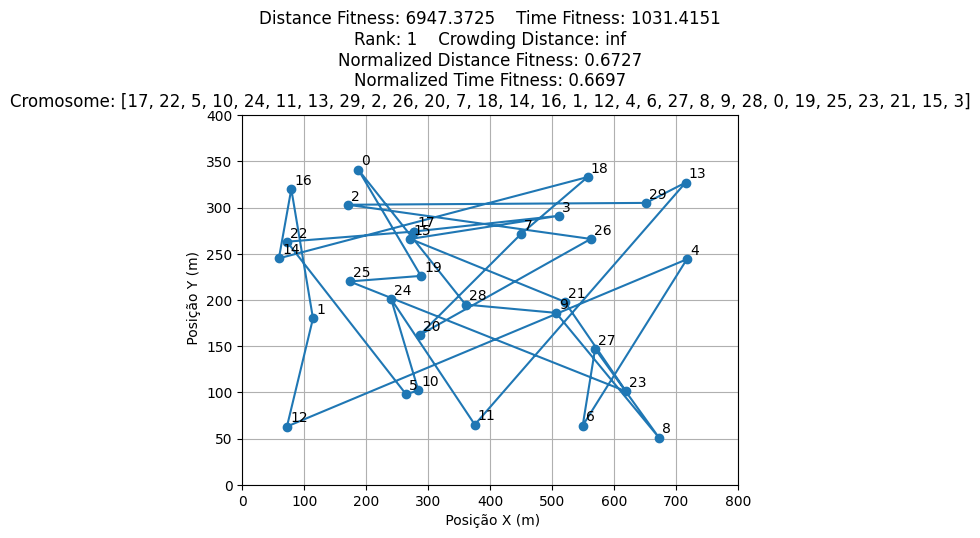

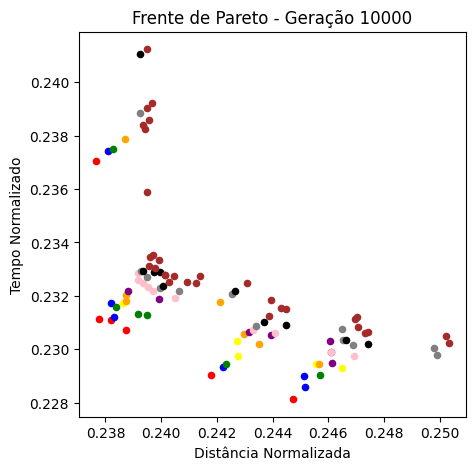

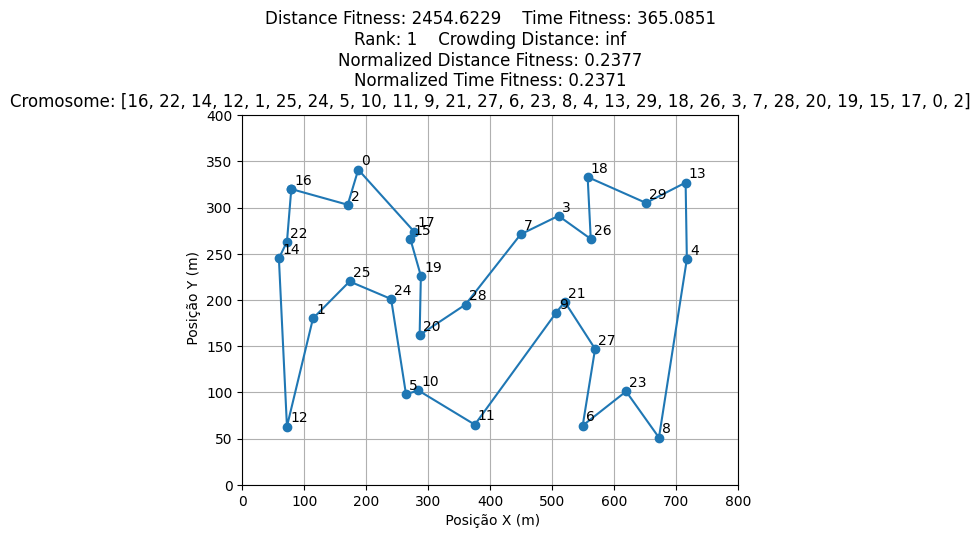

In [18]:
# Criar o mundo com a população inicial
world = World()

world.plot_Pareto_front()
world.get_best_individual().plot()

for i in range(10000):
    world.evolution()
    #world.plot_Pareto_front()
    #world.get_best_individual().plot()
    
world.plot_Pareto_front()
world.get_best_individual().plot()